In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [55]:
df=pd.read_csv("C:\\Users\\Seema\\Downloads\\1000_Companies.csv")

In [56]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
x=df.iloc[:,:-1].values #excluding last column
y=df.iloc[:,4].values #selecting the last row

In [58]:
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]
[192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.1696   89803.10053
  75297.23305 114284.5283  171985.0

<Axes: >

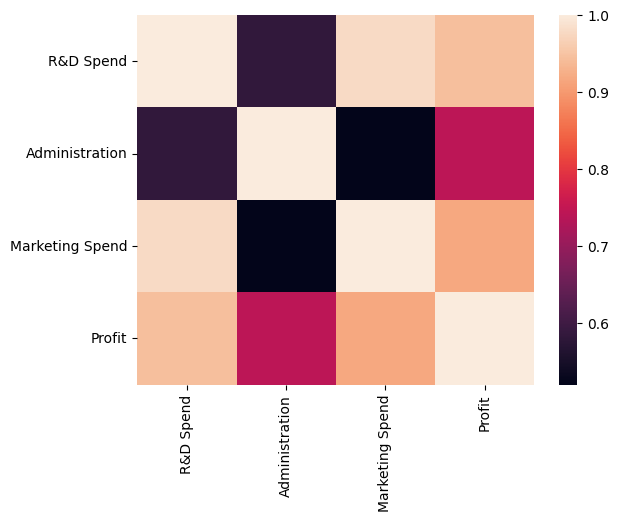

In [59]:
# data visualization 
#building correlation matrix
df_selected=df.select_dtypes(include="number")
sns.heatmap(df_selected.corr())

In [60]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

x[:, 3] = np.array(x[:, 3])
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])

ohe=OneHotEncoder(sparse_output=False,dtype=int)
t=ohe.fit_transform(x[:,3].reshape(-1,1))
print(x[:,:3])
x = np.hstack((x[:, :3],t)) 
'''
x[:, :3] — the first three columns (without the label encoded and one-hot encoded column),
t — the one-hot encoded column(s).
'''
#--------------------------------------------------------------------------------------------------
'''
column_transformer = ColumnTransformer(
    [("encoder", OneHotEncoder(), [3])],  # Specify column index to one-hot encode
    remainder="passthrough" )              # Keep other columns as is)
x = column_transformer.fit_transform(x)

x
'''
x


[[165349.2 136897.8 471784.1]
 [162597.7 151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 ...
 [100275.47 241926.31 227142.82]
 [128456.23 321652.14 281692.32]
 [161181.72 270939.86 295442.17]]


array([[165349.2, 136897.8, 471784.1, 0, 0, 1],
       [162597.7, 151377.59, 443898.53, 1, 0, 0],
       [153441.51, 101145.55, 407934.54, 0, 1, 0],
       ...,
       [100275.47, 241926.31, 227142.82, 1, 0, 0],
       [128456.23, 321652.14, 281692.32, 1, 0, 0],
       [161181.72, 270939.86, 295442.17, 0, 0, 1]], dtype=object)

In [61]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% rows are tested
#random_state=0 --> means dataset is shuffled 

In [62]:
y_train

array([ 81824.87341, 156340.4382 , 135591.4094 ,  60065.21791,
       142927.2094 , 175826.8244 ,  87219.72342, 135641.8126 ,
       169403.4076 ,  94974.98049, 136286.8026 , 126058.372  ,
        89949.14   ,  71235.93187, 166415.9507 , 138841.9881 ,
       126993.8211 , 137670.7546 ,  78239.91   , 129889.8688 ,
       169745.1241 , 108896.5127 , 123671.4819 , 117289.0711 ,
        59981.49735, 126295.865  , 178552.8682 ,  54119.34996,
       124266.9    , 172937.611  ,  69995.5008 , 151992.0952 ,
       134268.9664 ,  59766.21593,  85842.60573,  84782.43014,
        98397.27172,  76229.26494, 127455.1384 , 110228.3529 ,
        59342.48741, 101119.044  , 146874.0356 , 158160.0789 ,
       161035.6236 , 184979.7022 ,  55832.20416, 191050.39   ,
        67282.27141, 163155.1205 ,  64349.48913,  59264.74689,
       140237.9002 ,  62223.15791,  60947.70089, 128977.4856 ,
       167373.6113 , 120790.8114 ,  65743.69265,  81229.06   ,
       146690.3629 , 177513.1956 , 174996.4532 , 138079

In [63]:
#fitting multiple linear regression 
from sklearn.linear_model import LinearRegression 
model_fit=LinearRegression()
model_fit.fit(x_train,y_train)

LinearRegression()

In [70]:
# predicting the test set result 
y_pred=model_fit.predict(x_test)
pd.Series(y_pred)

0       89790.615329
1       88427.071874
2       94894.678370
3      175680.867256
4       83411.730421
           ...      
195    165897.619059
196    168655.486526
197    147009.668050
198    141396.221041
199    109086.506348
Length: 200, dtype: float64

In [71]:
#CALCULATING THE COEFFICIENT 
print(model_fit.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]


In [72]:
#calculating the intercept
print(model_fit.intercept_)

-51561.46494777099


In [73]:
#evaluting the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268794

In [74]:
# ABOVE 0.9 IT IS A GOOD MODEL